In [1]:
%run -i xcat_scripts/RGAsrs.py 

%run -i xcat_scripts/xcat04.py 

# Data analysis for XCAT

In [2]:
%run -i xcat_scripts/gaz_analysis.py

## Import valves data, long file that is not separated for each experiment

In [3]:
XCAT_data = XCAT("xcat_data/14-01/20210114-174718.txt")

,time_no,flow_no,setpoint_no,valve_no,time_h2,flow_h2,setpoint_h2,valve_h2,time_o2,flow_o2,...,flow_reactor,setpoint_reactor,valve_reactor,time_drain,flow_drain,setpoint_drain,valve_drain,time_valve,valve_MRS,valve_MIX
0,1.610643e+09,0.0,0.0,0.0,1.610643e+09,0.0,0.0,0.0,1.610643e+09,0.0,...,0.499969,0.499969,3.845699,1.610643e+09,0.501188,0.499969,0.869133,1.610643e+09,3.0,5.0
1,1.610643e+09,0.0,0.0,0.0,1.610643e+09,0.0,0.0,0.0,1.610643e+09,0.0,...,0.499969,0.499969,3.847043,1.610643e+09,0.501188,0.499969,0.925374,1.610643e+09,3.0,5.0
2,1.610643e+09,0.0,0.0,0.0,1.610643e+09,0.0,0.0,0.0,1.610643e+09,0.0,...,0.499969,0.499969,3.843983,1.610643e+09,0.501188,0.499969,0.983041,1.610643e+09,3.0,5.0
3,1.610643e+09,0.0,0.0,0.0,1.610643e+09,0.0,0.0,0.0,1.610643e+09,0.0,...,0.499969,0.499969,3.845811,1.610643e+09,0.501188,0.499969,1.040475,1.610643e+09,3.0,5.0
4,1.610643e+09,0.0,0.0,0.0,1.610643e+09,0.0,0.0,0.0,1.610643e+09,0.0,...,0.500062,0.499969,3.847279,1.610643e+09,0.501281,0.499969,1.100915,1.610643e+09,3.0,5.0


,time_no,flow_no,setpoint_no,valve_no,time_h2,flow_h2,setpoint_h2,valve_h2,time_o2,flow_o2,...,flow_reactor,setpoint_reactor,valve_reactor,time_drain,flow_drain,setpoint_drain,valve_drain,time_valve,valve_MRS,valve_MIX
102668,1.610726e+09,0.024375,60.0,8.818333,1.610726e+09,0.847500,59.999996,8.818333,1.610726e+09,59.990625,...,0.221719,0.0,8.818333,1.610726e+09,0.074344,0.0,8.818333,1.610726e+09,15.0,5.0
102669,1.610726e+09,0.018750,60.0,8.818333,1.610726e+09,0.785625,59.999996,8.818333,1.610726e+09,59.998125,...,0.221719,0.0,8.818333,1.610726e+09,0.074250,0.0,8.818333,1.610726e+09,15.0,5.0
102670,1.610726e+09,0.031875,60.0,8.818333,1.610726e+09,0.733125,59.999996,8.818333,1.610726e+09,59.988750,...,0.221719,0.0,8.818333,1.610726e+09,0.074250,0.0,8.818333,1.610726e+09,15.0,5.0
102671,1.610726e+09,0.013125,60.0,8.818333,1.610726e+09,0.699375,59.999996,8.818333,1.610726e+09,60.005625,...,0.221625,0.0,8.818333,1.610726e+09,0.074250,0.0,8.818333,1.610726e+09,15.0,5.0
102672,1.610726e+09,0.045000,60.0,8.818333,1.610726e+09,0.650625,59.999996,8.818333,1.610726e+09,60.000000,...,0.221625,0.0,8.818333,1.610726e+09,0.074250,0.0,8.818333,1.610726e+09,15.0,5.0


## Separate the xcat data in dataframes

In [17]:
XCAT_data.separate_xcat_dataframes(['O2','CO','Ar','shunt', "reactor", "drain", "valve"])

# Example of Ar
# display(XCAT_data.o2_df.head())
# display(XCAT_data.o2_df.tail())

New dataframe created starting for O2.
New dataframe created starting for CO.
New dataframe created starting for Ar.
New dataframe created starting for shunt.
New dataframe created starting for reactor.
New dataframe created starting for drain.
New dataframe created starting for valve.


## Find the timestamp of the rga data, so that we know which part of the valves data we are interested in

In [4]:
XCAT_data.load_rga("xcat_data/15-01/testbatchstochio_tris.txt")

Timestamp: 1610722655.0 (unix epoch).
Experiment duration: 3231 seconds.
New interpolated dataframe created for rga.


,time,CO,O2,Ar,CO2,C,H2
0,0,7.814100e-07,2.950500e-07,0.000014,4.842800e-08,1.563300e-08,3.238100e-08
1,1,7.008084e-07,2.686397e-07,0.000014,4.842800e-08,1.162511e-08,2.678731e-08
2,2,6.379424e-07,2.384217e-07,0.000014,4.985957e-08,1.546317e-08,3.214398e-08
3,3,5.735482e-07,2.147412e-07,0.000014,4.719281e-08,1.068423e-08,2.848255e-08
4,4,5.143560e-07,1.907014e-07,0.000014,4.693900e-08,1.147175e-08,3.207292e-08


,time,CO,O2,Ar,CO2,C,H2
3227,3227,3.217046e-08,7.866323e-09,0.000015,3.558459e-08,1.743931e-09,3.238100e-08
3228,3228,3.238100e-08,8.663694e-09,0.000015,3.644782e-08,1.484334e-09,3.238100e-08
3229,3229,3.079273e-08,6.226200e-09,0.000015,3.515349e-08,1.792753e-09,3.238100e-08
3230,3230,2.953757e-08,6.708733e-09,0.000015,3.610627e-08,5.115297e-10,3.032146e-08
3231,3231,3.214335e-08,7.110842e-09,0.000015,3.380900e-08,-3.037700e-10,2.670900e-08


## Truncate the xcat dataframes based on the timestamp of the rga data file

In [18]:
XCAT_data.truncate_xcat_df()

# Example of Ar
# display(XCAT_data.ar_df_truncated.head())
# display(XCAT_data.ar_df_truncated.tail())

New truncated dataframe created starting from timestamp for o2 and for 3231 seconds.
New truncated dataframe created starting from timestamp for co and for 3231 seconds.
New truncated dataframe created starting from timestamp for ar and for 3231 seconds.
New truncated dataframe created starting from timestamp for shunt and for 3231 seconds.
New truncated dataframe created starting from timestamp for reactor and for 3231 seconds.
New truncated dataframe created starting from timestamp for drain and for 3231 seconds.
New truncated dataframe created starting from timestamp for valve and for 3231 seconds.


## Interpolate on integer seconds

In [19]:
XCAT_data.interpolate_xcat_df()

# Example of Ar
# display(XCAT_data.ar_df_interpolated.head())
# display(XCAT_data.ar_df_interpolated.tail())

New interpolated dataframe created for o2.
New interpolated dataframe created for co.
New interpolated dataframe created for ar.
New interpolated dataframe created for shunt.
New interpolated dataframe created for reactor.
New interpolated dataframe created for drain.
New interpolated dataframe created for valve.


## Plot raw rga data

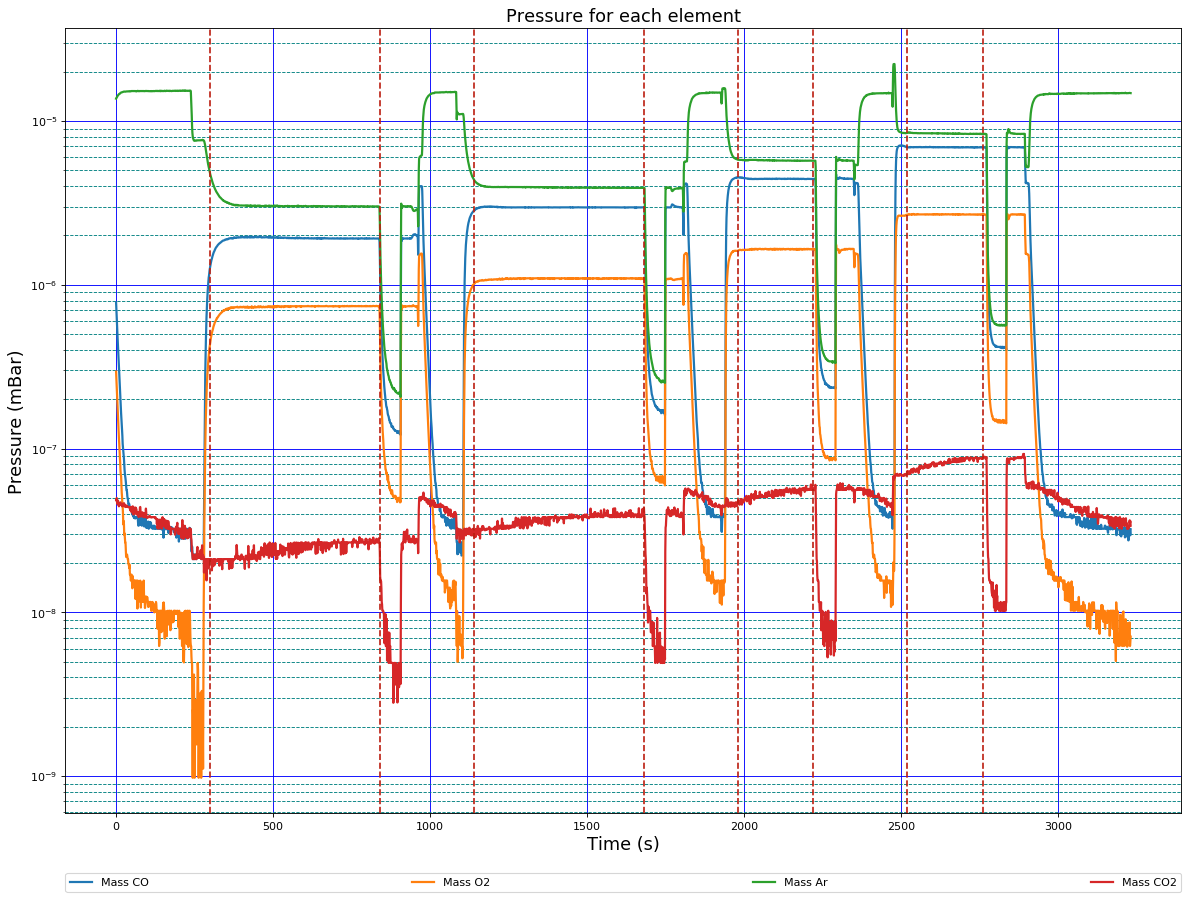

In [8]:
XCAT_data.plot_rga(
                interpolated_data=True,
                plotted_columns = ["CO", "O2", "Ar", "CO2"],
                cursor_positions = [300, 840, 1140, 1680, 1980, 2220, 2520, 2760])

## Plot normalized by leak valve values

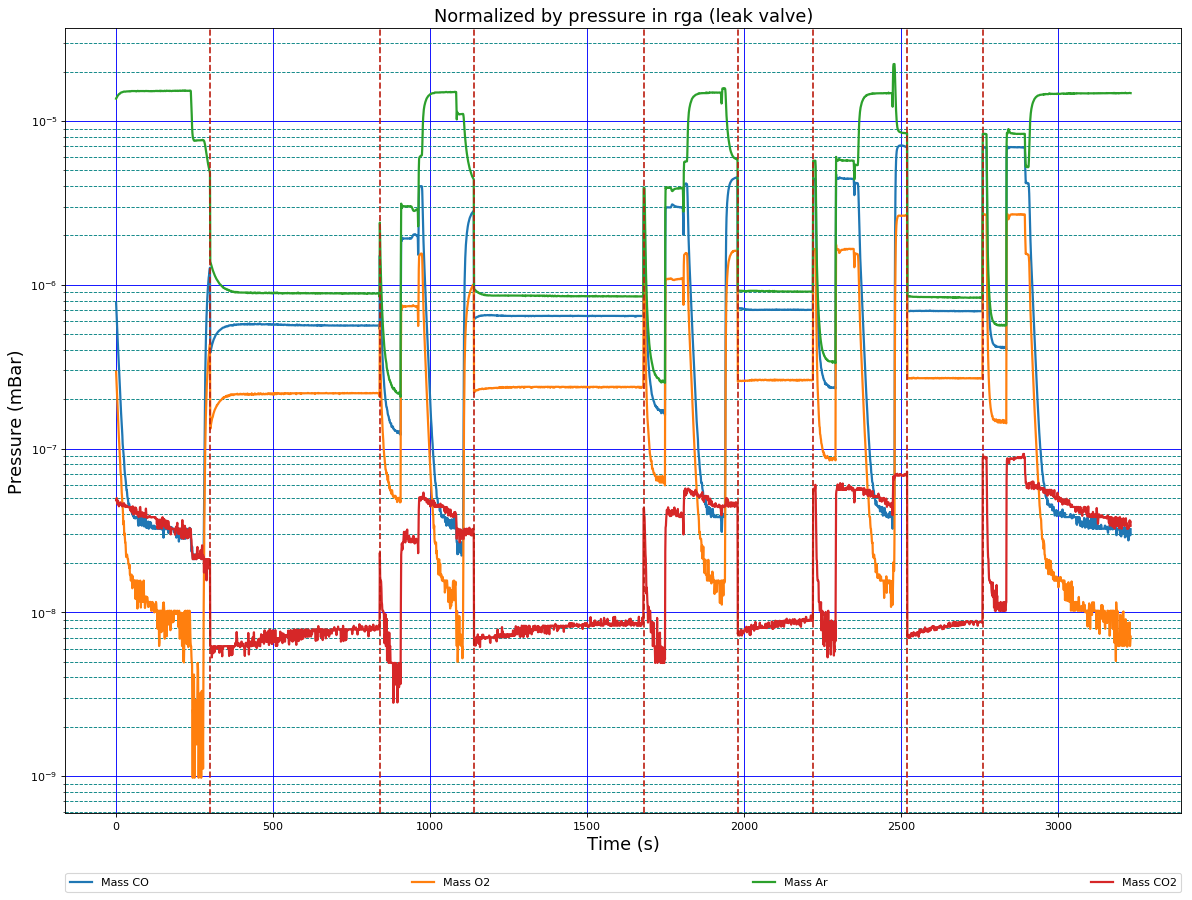

In [9]:
XCAT_data.plot_rga_norm_leak(
                        plotted_columns = ["CO", "O2", "Ar", "CO2"],
                        leak_values = [3.4, 1, 4.6, 1, 6.3, 1, 10],
                        leak_positions = [300, 840, 1140, 1680, 1980, 2220, 2520, 2760],
                        cursor_positions = [300, 840, 1140, 1680, 1980, 2220, 2520, 2760])

## Plot normalized by total pressure (here 0.5 bar)

,time,CO,O2,Ar,CO2,C,H2
0,0.0,0.026270,0.009919,0.460569,0.001628,0.000526,0.001089
1,1.0,0.023515,0.009014,0.464557,0.001625,0.000390,0.000899
2,2.0,0.021470,0.008024,0.467225,0.001678,0.000520,0.001082
3,3.0,0.019254,0.007209,0.470638,0.001584,0.000359,0.000956
4,4.0,0.017184,0.006371,0.473421,0.001568,0.000383,0.001072


No cursor


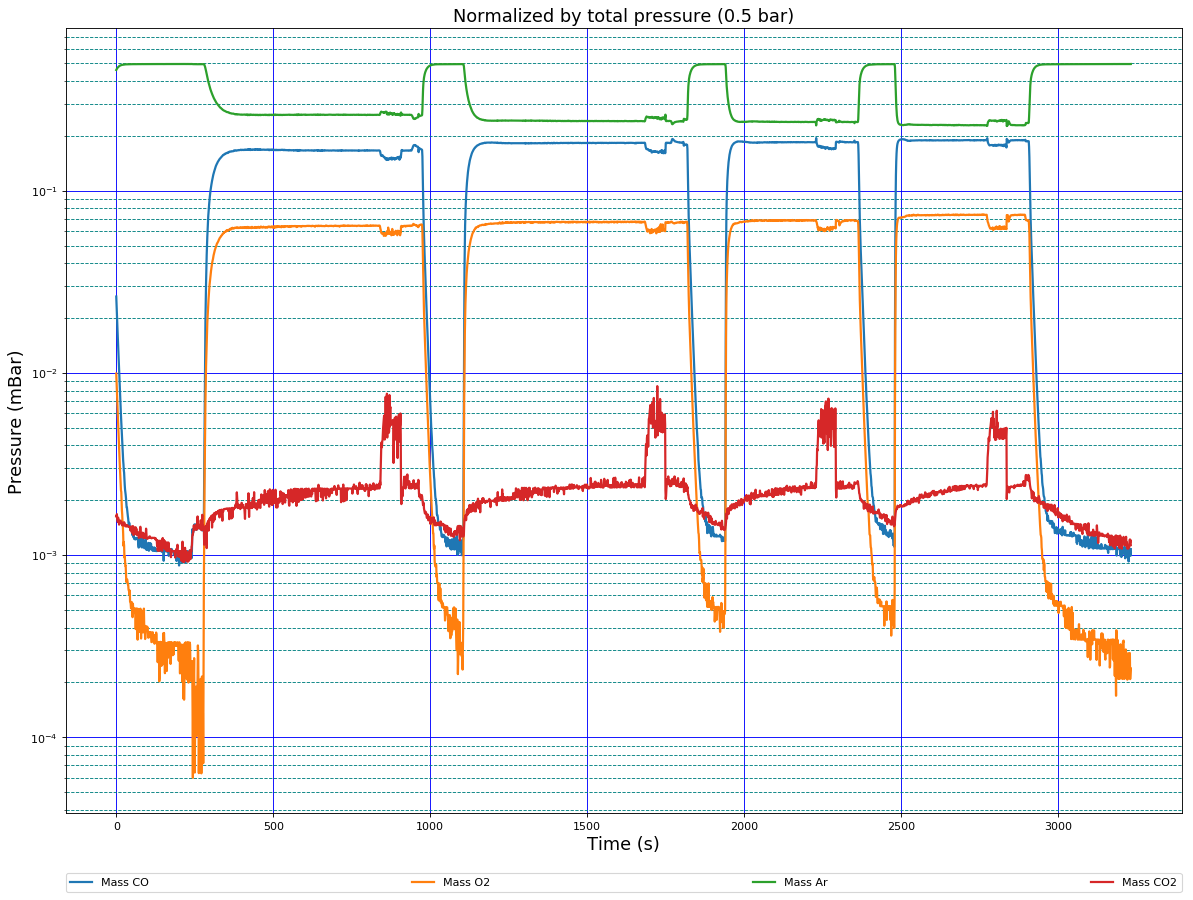

In [10]:
df = XCAT_data.plot_rga_norm_ptot(
    ptot=0.5,
    plotted_columns = ["CO", "O2", "Ar", "CO2"],
    interpolated_data=True,
    #cursor_positions = [300, 840, 1140, 1680, 1980, 2220, 2520, 2760]
)

,time,CO,O2,Ar,CO2,C,H2
0,0.0,0.026270,0.009919,0.460569,0.001628,0.000526,0.001089
1,1.0,0.023515,0.009014,0.464557,0.001625,0.000390,0.000899
2,2.0,0.021470,0.008024,0.467225,0.001678,0.000520,0.001082
3,3.0,0.019254,0.007209,0.470638,0.001584,0.000359,0.000956
4,4.0,0.017184,0.006371,0.473421,0.001568,0.000383,0.001072


No cursor


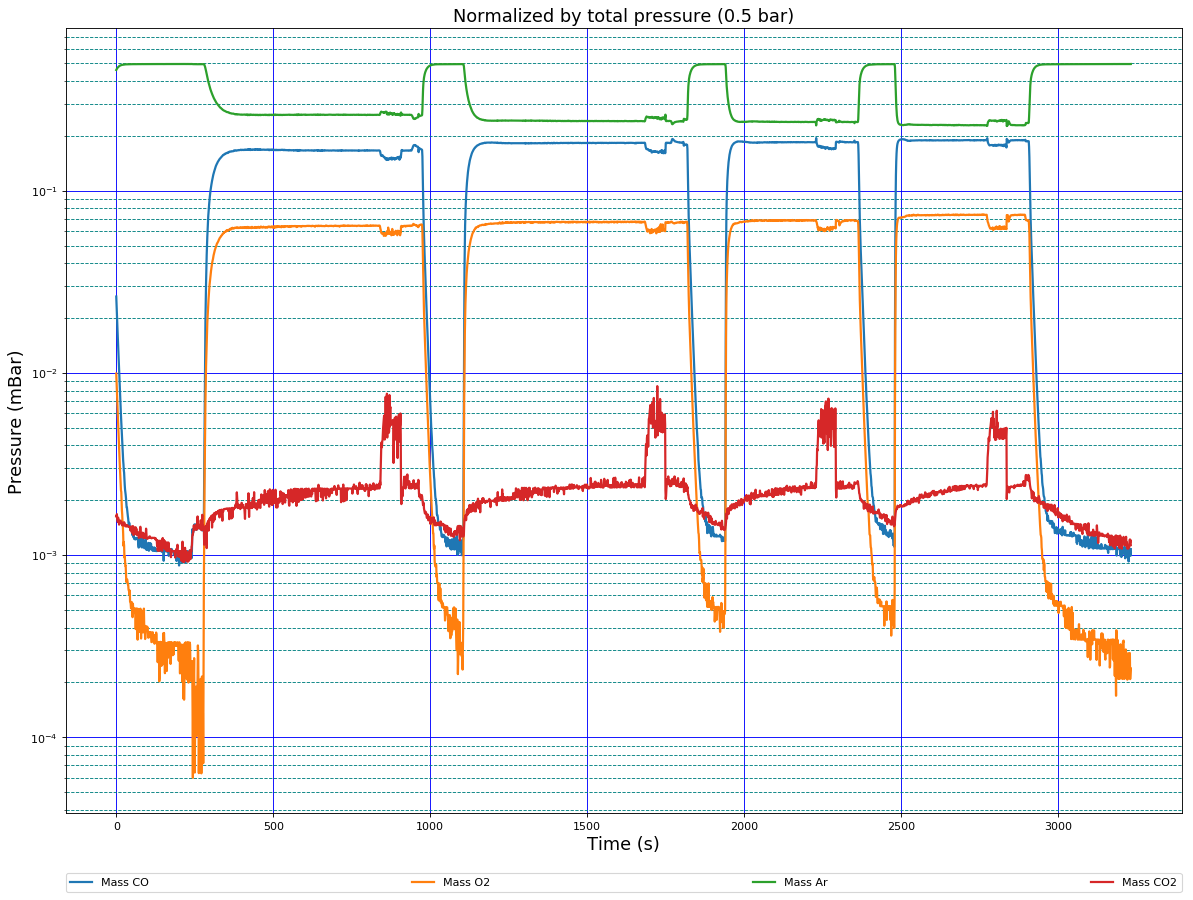

In [11]:
df = XCAT_data.plot_rga_norm_ptot(
    ptot=0.5,
    plotted_columns = ["CO", "O2", "Ar", "CO2"],
    #cursor_positions = [300, 840, 1140, 1680, 1980, 2220, 2520, 2760]
)

## Plot normalised by carrier gaz

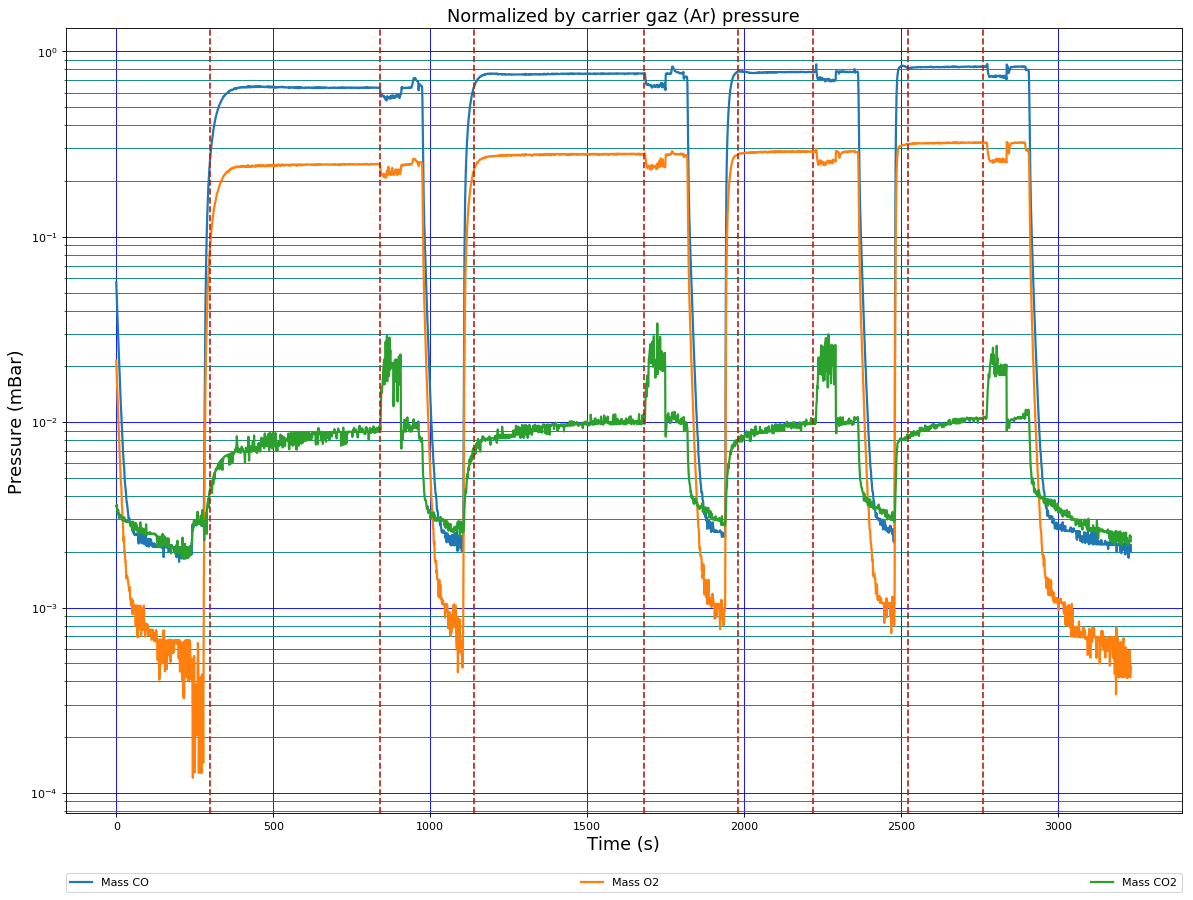

In [12]:
XCAT_data.plot_rga_norm_carrier(
    plotted_columns = ["CO", "O2", "Ar", "CO2"],
    carrier_gaz = "Ar",
    cursor_positions = [300, 840, 1140, 1680, 1980, 2220, 2520, 2760])

## Ar

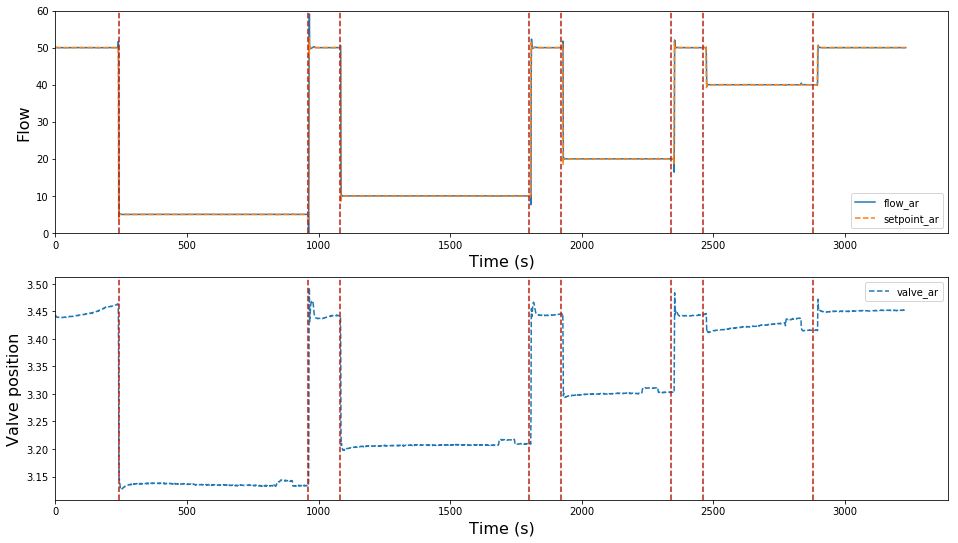

In [13]:
XCAT_data.plot_xcat_entry(["Ar"],
                          zoom1 = [0, None, 0, 60],
                          zoom2 = [0, None, None, None],
                          cursor_positions = [240, 960, 1080, 1800, 1920, 2340, 2460, 2880]
                         )

## O2

No cursor


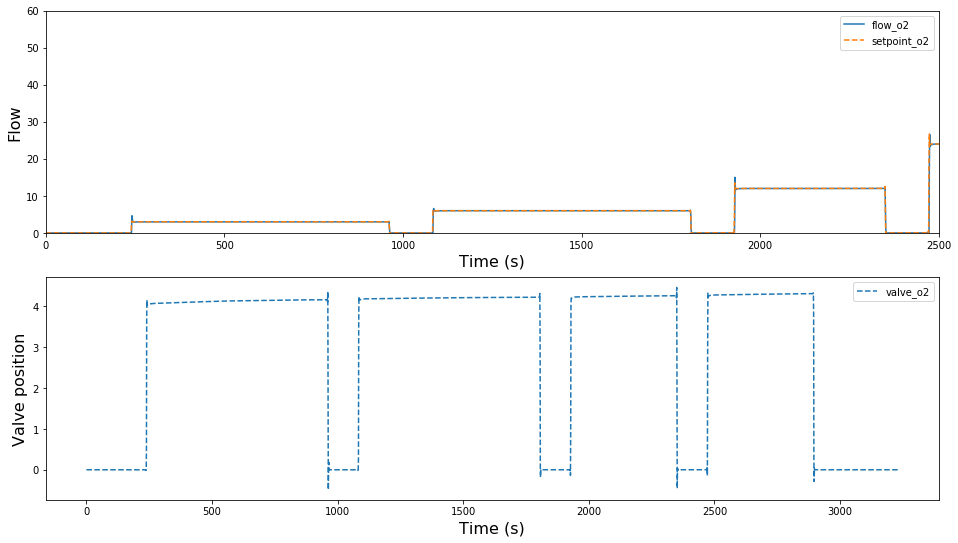

In [14]:
XCAT_data.plot_xcat_entry(["O2"], zoom1 = [0, 2500, 0, 60])

## CO

No cursor


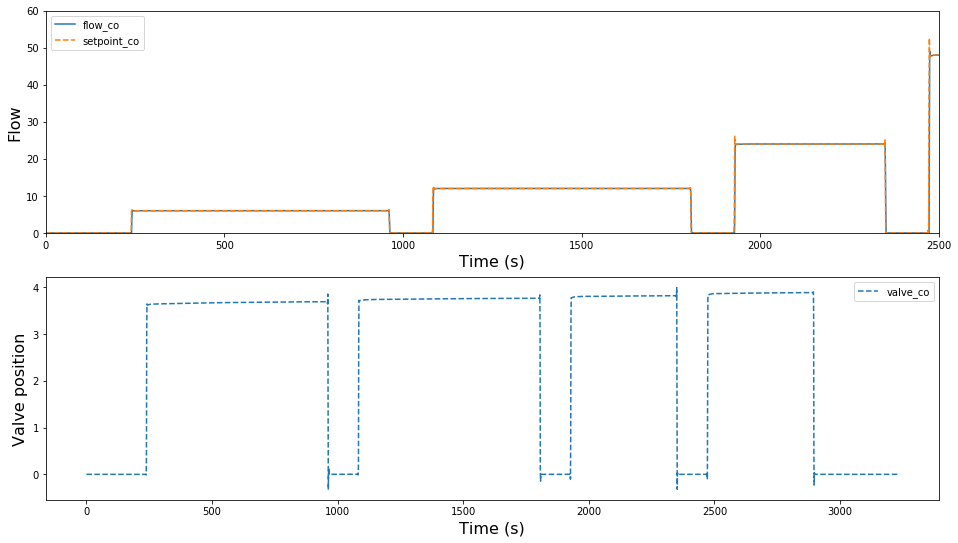

In [15]:
XCAT_data.plot_xcat_entry(["CO"], zoom1 = [0, 2500, 0, 60])

## Valves

No cursor


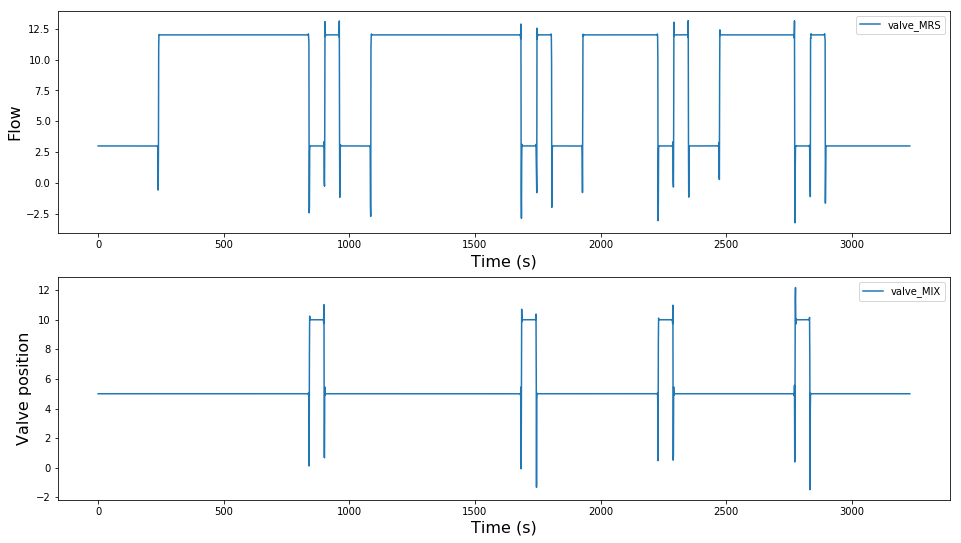

In [16]:
XCAT_data.plot_xcat_valves()